In [1]:
%matplotlib nbagg
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
print("start!")

rnorm=np.ones(20)
print (rnorm)

ims = []
dataall=[]
print(dataall)
dataall=np.zeros((4000, 2409))
N = 2409  # 1レコード番号あたりに格納されているデータの数。
M = 4000  # レコードの総数。
numb=1
for i in range(8):
    fol=format(i, '03b')
    for j in range(10):
        numb+=1
        mass="{0:02d}".format(j+1)
        fname='./glbdsk_str'+fol+"M"+mass+'.dat'
        f = open(fname, 'r')
        dty = np.dtype([('data', '<' + str(N) + 'f')])
        chunk = np.fromfile(f, dtype=dty, count=M)
        data = []
        for k in range(M):
            data.append(chunk[k]['data'])
        data=np.array(data)
        dataall=np.dstack((dataall, data))
        if(j==7):
            print(fname,numb)
            #print(dataall.nbytes)
#print(dataall.shape)
print("end")

start!
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[]
./glbdsk_str000M08.dat 9
./glbdsk_str001M08.dat 19
./glbdsk_str010M08.dat 29
./glbdsk_str011M08.dat 39
./glbdsk_str100M08.dat 49
./glbdsk_str101M08.dat 59
./glbdsk_str110M08.dat 69
./glbdsk_str111M08.dat 79
end


In [1]:
import matplotlib.animation as animation
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import gridspec
dataall=np.load('dataall_50-all4.npy')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2


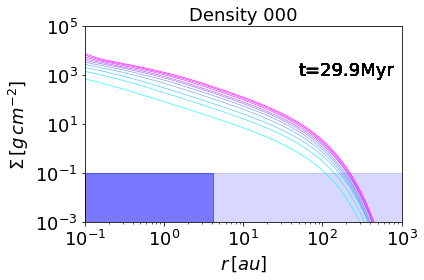

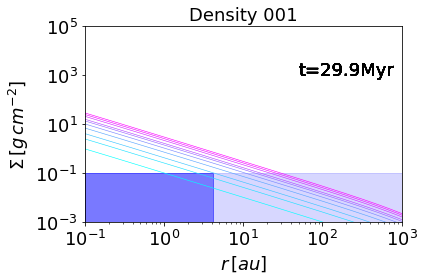

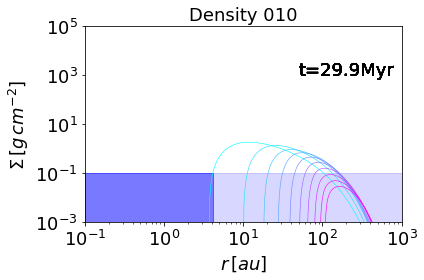

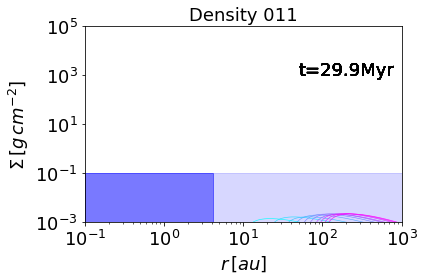

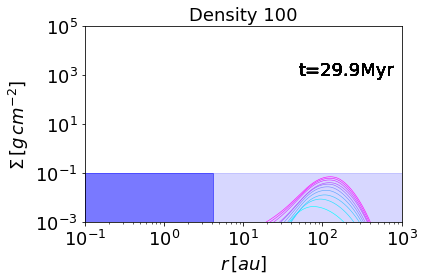

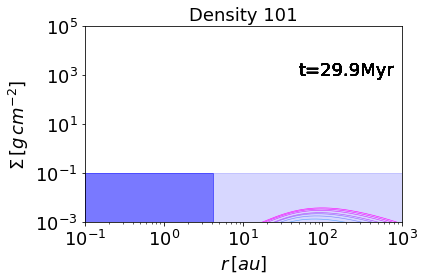

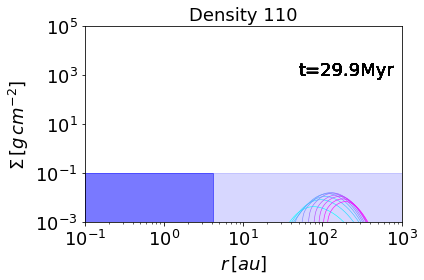

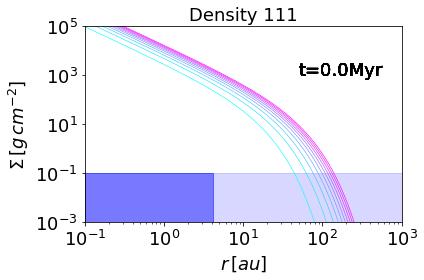

In [2]:
#au
box_size_xmin = 1e-1
box_size_xmax = 1e+3
box_size_ymin = 1e-3
box_size_ymax = 1e+05
rnorm=np.ones(20)
print (rnorm)
cmap=plt.get_cmap("cool")  

for cond in range(8):
    cond3=format(cond, '03b')

    fig = plt.figure()
    #pltdat=dataall[:,:,62]
    print("1")
    class Init:
          def __init__(self, i):
            plt.xscale('log')
            plt.yscale('log')
            plt.xlabel(r'$r\,[au]$', fontsize=18)
            plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
            plt.xlim(box_size_xmin, box_size_xmax)
            plt.ylim(box_size_ymin, box_size_ymax)
            plt.title('Density '+cond3, fontsize=18)    
            plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
            testx = [1e-01,4.133,4.133,1e-01]
            testy = [1e-03,1e-03,1e-01,1e-01]
            plt.fill(testx,testy,color="b",alpha=0.05)
            testx2 = [1e-01,1000,1000,1e-01]
            testy2 = [1e-03,1e-03,1e-01,1e-01]
            plt.fill(testx2,testy2,color="b",alpha=0.015)
            plt.tick_params(labelsize=18)
            mpl.rcParams['axes.xmargin'] = 0
            mpl.rcParams['axes.ymargin'] = 0
            plt.tight_layout()

    def updata(i):
                plt.cla()
                for j in range(10):
                    k=j+1+(cond*10)
                    pltdat=dataall[:,:,k]
                    Init(i)
                    #data = np.loadtxt("./dust%d.dat" % (i*5));
                    x = []
                    y = []
                    x.extend(pltdat[:,0])
                    y.extend(pltdat[:,i+1])
                    x=np.dot(x,rnorm[j%10])
                    plt.plot(x, y, color=cmap(j*30),linewidth = 0.6)
                    #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")

    ani = animation.FuncAnimation(fig, updata, interval=100, frames=300)
    #ani.save("anime17_"+cond3+"au3.gif", writer="imagemagick")
    ani.save("anime21_"+cond3+"0412au300.mp4", writer="ffmpeg")
    print("2")

[2.34422882 2.10980593 1.87538305 1.64096017 1.40653729 1.17211441
 0.93769153 0.70326864 0.46884576 0.23442288]
[1.30726539 1.84875245 2.26425008 2.61453078 2.92313428 3.20213317
 3.45869913 3.6975049  3.92179618 4.13393615]
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2


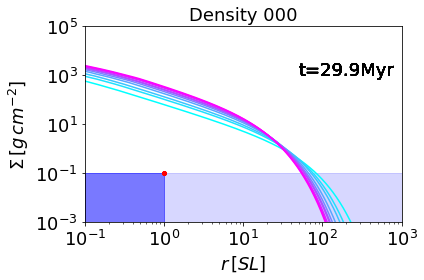

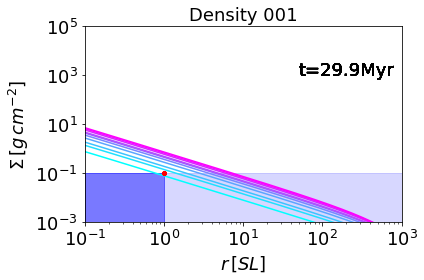

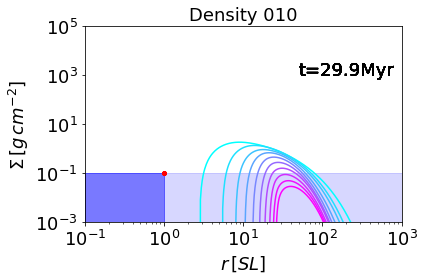

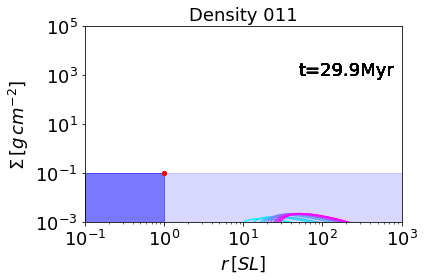

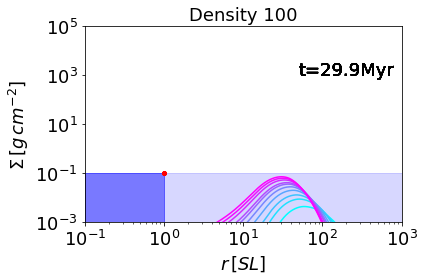

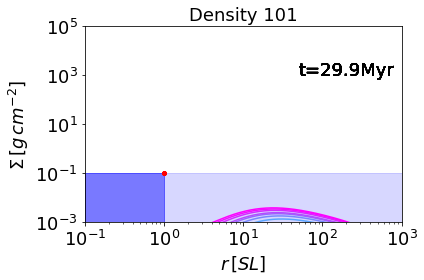

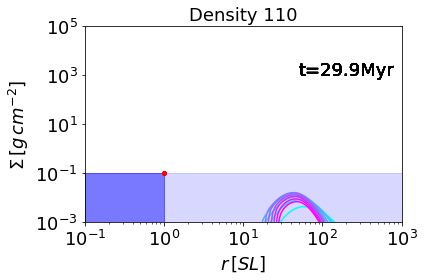

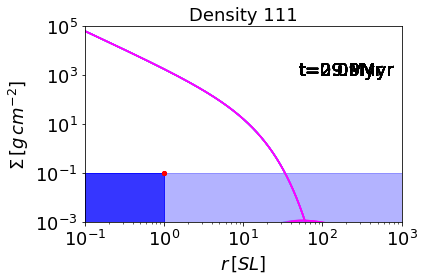

In [5]:
#L=M^1,2,4 snowline
import numpy as np
import scipy.optimize
X=np.linspace(1,0.1,10)#Mass distribution
parameter_initial = np.array([0,0])
def func(x,a,b):
    return  a*x
    #return  a*(x**2)
    #return  a*(x**4)
y4 = func(X,10**0.37,1)
rrnorm=(1.0/y4)**0.5
print(y4)
rnorm =rrnorm[::-1]/2.7
print (1/rnorm)

for cond in range(8):
    cond3=format(cond, '03b')

    fig = plt.figure()
    #pltdat=dataall[:,:,62]
    print("1")
    class Init:
      def __init__(self, i):
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel(r'$r\,[SL]$', fontsize=18)
        plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
        plt.xlim(box_size_xmin, box_size_xmax)
        plt.ylim(box_size_ymin, box_size_ymax)
        plt.title('Density '+cond3, fontsize=18)    
        plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
        testx = [1e-01,1.0,1.0,1e-01]
        testy = [1e-03,1e-03,1e-01,1e-01]
        plt.fill(testx,testy,color="b",alpha=0.05)
        testx2 = [1e-01,1000,1000,1e-01]
        testy2 = [1e-03,1e-03,1e-01,1e-01]
        plt.fill(testx2,testy2,color="b",alpha=0.015)
        plt.plot(1.0,0.1,marker = '.',color = 'r',markersize = 7)
        plt.tick_params(labelsize=18)
        mpl.rcParams['axes.xmargin'] = 0
        mpl.rcParams['axes.ymargin'] = 0
        plt.tight_layout()

    cmap=plt.get_cmap("cool")  
    k=0
    def updata(i):
      if i != 0:
        plt.cla()
      for j in range(10):
                  k=j+1+(cond*10)
                  pltdat=dataall[:,:,k]
                  Init(i)
                  #data = np.loadtxt("./dust%d.dat" % (i*5));
                  x = []
                  y = []
                  x.extend(pltdat[:,0])
                  y.extend(pltdat[:,i+1])
                  x=np.dot(x,rnorm[j%10])
                  plt.plot(x, y, color=cmap(j*30))
                  #,linewidth = (j+1)**0.6
                  #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")

    ani = animation.FuncAnimation(fig, updata, interval=100, frames=300)
    #ani.save("anime17_"+cond3+"SL.gif", writer="imagemagick")
    ani.save("anime22_"+cond3+"0412SL1L1.mp4", writer="ffmpeg")
    print("2")

In [4]:
#L=M^1,2,4 snowline
import numpy as np
import scipy.optimize
X=np.linspace(1,0.1,10)#Mass distribution
parameter_initial = np.array([0,0])
def func(x,a,b):
    #return  a*x
    return  a*(x**2)
    #return  a*(x**4)
y4 = func(X,10**0.37,1)
rrnorm=(1.0/y4)**0.5
print(y4)
rnorm =rrnorm[::-1]/2.7
print (1/rnorm)

[2.34422882 1.89882534 1.50030644 1.14867212 0.84392237 0.5860572
 0.37507661 0.21098059 0.09376915 0.02344229]
[0.41339361 0.82678723 1.24018084 1.65357446 2.06696807 2.48036169
 2.8937553  3.30714892 3.72054253 4.13393615]
